In [1]:
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# Load the dataset
accident_df = pd.read_csv('/Users/sanjeevsingh/Dropbox/Courses/DSE511/Project-3/acc_6_cities.csv')
accident_df.replace("", float("NaN"), inplace=True)
accident_df.replace(" ", float("NaN"), inplace=True)
count_missing_value = accident_df.isna().sum() / accident_df.shape[0] * 100

# Create duration feature
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'])
accident_df['End_Time'] = pd.to_datetime(accident_df['End_Time'])
accident_df['Duration'] = (accident_df['End_Time'] - accident_df['Start_Time']).dt.total_seconds() / 3600.0  # Hours

# Club the target variables
accident_df.loc[(accident_df['Severity'] == 1) | (accident_df['Severity'] == 2), 'Severity'] = 0
accident_df.loc[(accident_df['Severity'] == 3) | (accident_df['Severity'] == 4), 'Severity'] = 1
count_missing_value

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   75.159532
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.798487
Temperature(F)            1.017463
Wind_Chill(F)            37.336459
Humidity(%)               1.063912
Pressure(in)              1.035158
Visibility(mi)            0.992026
Wind_Direction            1.758441
Wind_Speed(mph)          10.342730
Precipitation(in)   

## 1. Mean duration of accident by severity overall and by cities. 

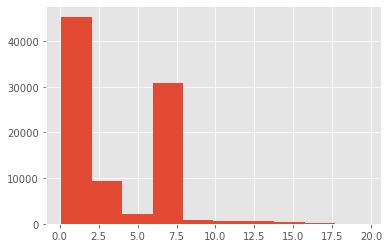

0.997489521239535

In [142]:
plt.hist(accident_df[accident_df['Duration'] <= 20]['Duration'])
plt.show()
len(accident_df[accident_df['Duration'] <= 20]['Duration']) / len(accident_df['Duration'])

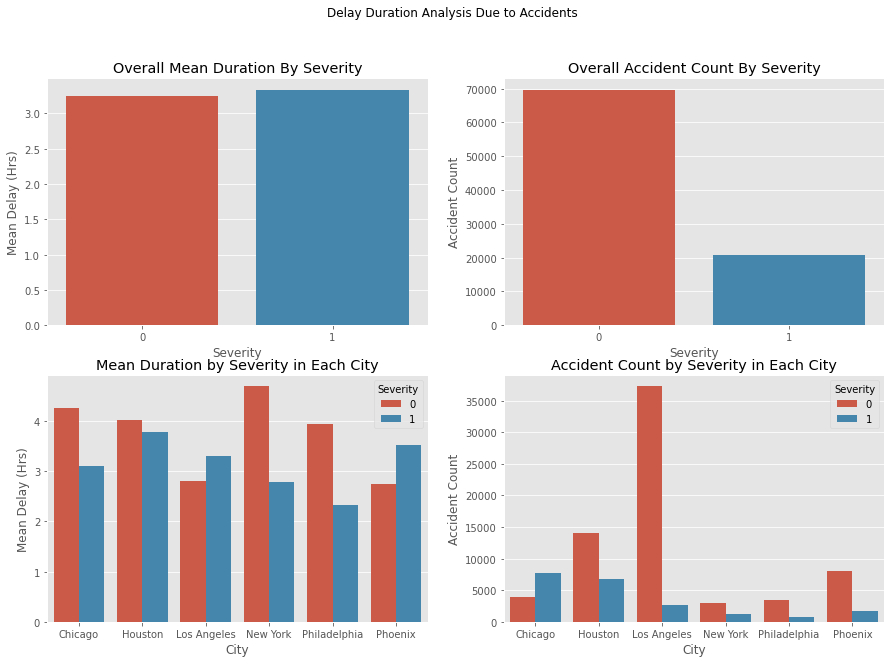

In [145]:
# Create plots

# Filter outliers
plot1_df = accident_df[accident_df['Duration'] <= 50]

# Create duration plots by severity
df1 = plot1_df.groupby(['Severity']).agg(mean_duration=('Duration','mean'))
df1 = df1.reset_index()

# Create duration plots by cities and severity
df2 = plot1_df.groupby(['Severity', 'City']).agg(mean_duration=('Duration','mean'))
df2 = df2.reset_index()

# Create count plots by severity
df3 = plot1_df.groupby(['Severity']).agg(count=('Duration','count'))
df3 = df3.reset_index()

# Create count plots by cities and severity
df4 = plot1_df.groupby(['Severity', 'City']).agg(count=('Duration','count'))
df4 = df4.reset_index()


fig, axs = plt.subplots(2, 2, figsize=(15,10))    

fig.suptitle('Delay Duration Analysis Due to Accidents')
sns.barplot(ax=axs[0, 0], x="Severity", y="mean_duration", data=df1)
axs[0,0].set_title("Overall Mean Duration By Severity")
axs[0,0].set_xlabel("Severity")
axs[0,0].set_ylabel("Mean Delay (Hrs)")

sns.barplot(ax=axs[0, 1], x="Severity", y="count", data=df3)
axs[0,1].set_title("Overall Accident Count By Severity")
axs[0,1].set_xlabel("Severity")
axs[0,1].set_ylabel("Accident Count")


sns.barplot(ax=axs[1, 0], x="City", y="mean_duration", hue="Severity", data=df2)
axs[1, 0].set_title("Mean Duration by Severity in Each City")
axs[1, 0].set_xlabel("City")
axs[1, 0].set_ylabel("Mean Delay (Hrs)")

sns.barplot(ax=axs[1, 1], x="City", y="count", hue="Severity", data=df4)
axs[1, 1].set_title("Accident Count by Severity in Each City")
axs[1, 1].set_xlabel("City")
axs[1, 1].set_ylabel("Accident Count")

plt.show()

## 2. Mean Distance of accident by severity overall and by cities. 

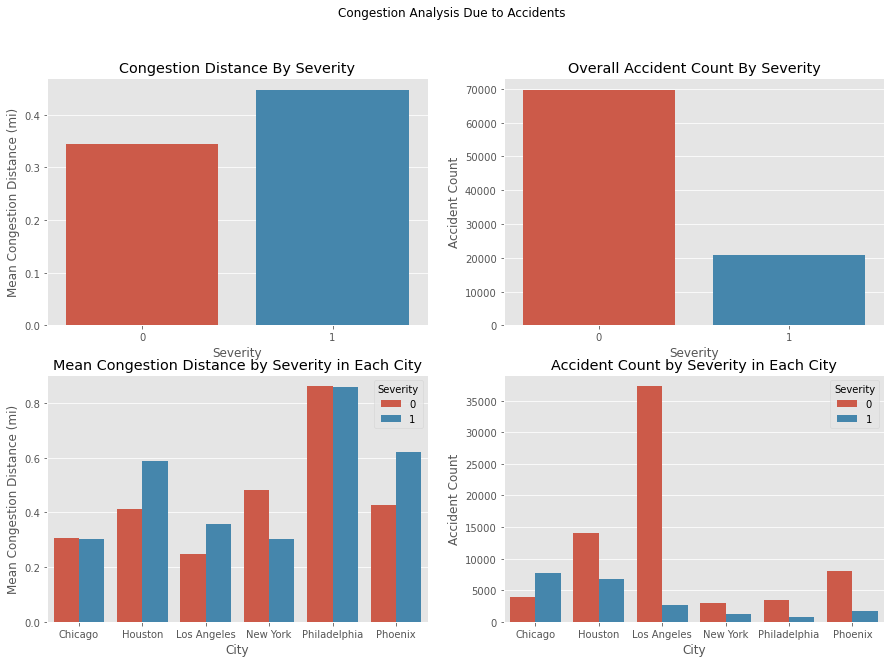

In [152]:
# Create plots

# Filter outliers
plot1_df = accident_df[accident_df['Distance(mi)'] <= 50]

# Create duration plots by severity
df1 = plot1_df.groupby(['Severity']).agg(mean_distance=('Distance(mi)','mean'))
df1 = df1.reset_index()

# Create duration plots by cities and severity
df2 = plot1_df.groupby(['Severity', 'City']).agg(mean_distance=('Distance(mi)','mean'))
df2 = df2.reset_index()

# Create count plots by severity
df3 = plot1_df.groupby(['Severity']).agg(count=('Distance(mi)','count'))
df3 = df3.reset_index()

# Create count plots by cities and severity
df4 = plot1_df.groupby(['Severity', 'City']).agg(count=('Distance(mi)','count'))
df4 = df4.reset_index()


fig, axs = plt.subplots(2, 2, figsize=(15,10))    

fig.suptitle('Congestion Analysis Due to Accidents')
sns.barplot(ax=axs[0, 0], x="Severity", y="mean_distance", data=df1)
axs[0,0].set_title("Congestion Distance By Severity")
axs[0,0].set_xlabel("Severity")
axs[0,0].set_ylabel("Mean Congestion Distance (mi)")

sns.barplot(ax=axs[0, 1], x="Severity", y="count", data=df3)
axs[0,1].set_title("Overall Accident Count By Severity")
axs[0,1].set_xlabel("Severity")
axs[0,1].set_ylabel("Accident Count")


sns.barplot(ax=axs[1, 0], x="City", y="mean_distance", hue="Severity", data=df2)
axs[1, 0].set_title("Mean Congestion Distance by Severity in Each City")
axs[1, 0].set_xlabel("City")
axs[1, 0].set_ylabel("Mean Congestion Distance (mi)")

sns.barplot(ax=axs[1, 1], x="City", y="count", hue="Severity", data=df4)
axs[1, 1].set_title("Accident Count by Severity in Each City")
axs[1, 1].set_xlabel("City")
axs[1, 1].set_ylabel("Accident Count")

plt.show()

## 3. Accident Distribution by Severity and by Sunrise/Sunset

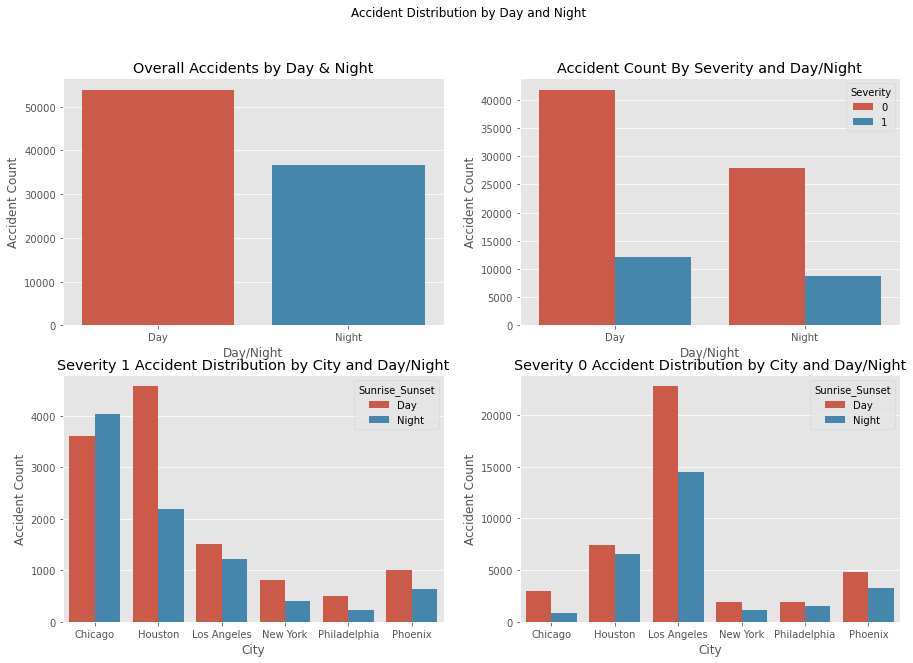

In [130]:
# Accident Distribution by Severity and Sunrise/Sunset
plot1_df = accident_df
df0 = plot1_df.groupby(['Sunrise_Sunset']).agg(count=('Severity','count'))
df0 = df0.reset_index()

df1 = plot1_df.groupby(['Severity', 'Sunrise_Sunset']).agg(count=('Severity','count'))
df1 = df1.reset_index()

plot2_df = accident_df[accident_df['Severity']==1]
df2 = plot2_df.groupby(['City', 'Sunrise_Sunset']).agg(count=('Severity','count'))
df2 = df2.reset_index()

plot3_df = accident_df[accident_df['Severity']==0]
df3 = plot3_df.groupby(['City', 'Sunrise_Sunset']).agg(count=('Severity','count'))
df3 = df3.reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15,10))    

fig.suptitle('Accident Distribution by Day and Night')
sns.barplot(ax=axs[0, 0], x="Sunrise_Sunset", y="count", data=df0)
axs[0,0].set_title("Overall Accidents by Day & Night")
axs[0,0].set_xlabel("Day/Night")
axs[0,0].set_ylabel("Accident Count")

sns.barplot(ax=axs[0, 1], x="Sunrise_Sunset", y="count", hue="Severity", data=df1)
axs[0,1].set_title("Accident Count By Severity and Day/Night")
axs[0,1].set_xlabel("Day/Night")
axs[0,1].set_ylabel("Accident Count")


sns.barplot(ax=axs[1, 0], x="City", y="count", hue="Sunrise_Sunset", data=df2)
axs[1, 0].set_title("Severity 1 Accident Distribution by City and Day/Night")
axs[1, 0].set_xlabel("City")
axs[1, 0].set_ylabel("Accident Count")

sns.barplot(ax=axs[1, 1], x="City", y="count", hue="Sunrise_Sunset", data=df3)
axs[1, 1].set_title("Severity 0 Accident Distribution by City and Day/Night")
axs[1, 1].set_xlabel("City")
axs[1, 1].set_ylabel("Accident Count")

plt.show()

## 4. Distribution of accident by severity and weather condition 

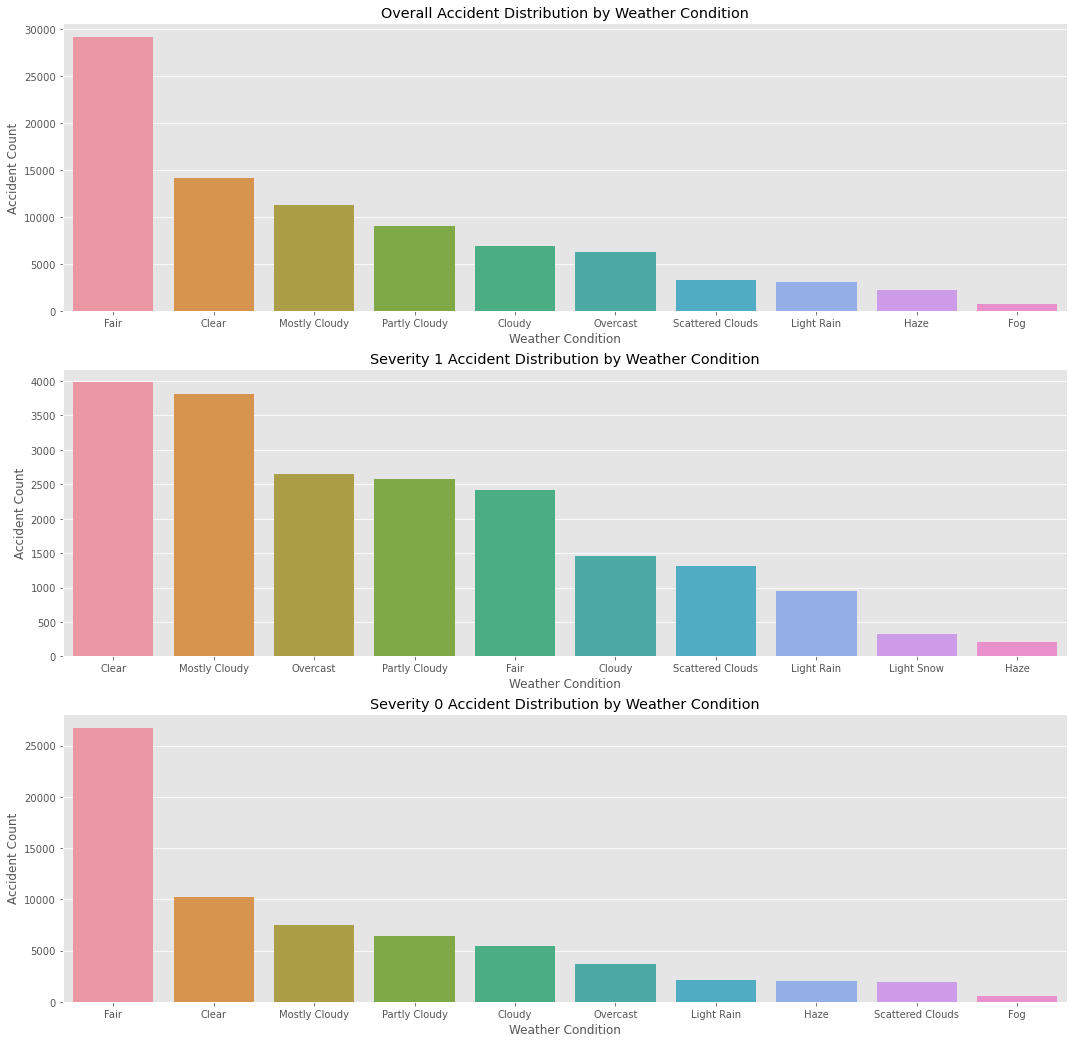

In [128]:
plot1_df = accident_df
df0 = plot1_df.groupby(['Weather_Condition']).agg(count=('Severity','count'))
df0 = df0.sort_values(['count'], ascending=False)[:10]
df0 = df0.reset_index()

plot2_df = accident_df[accident_df['Severity']==1]
df1 = plot2_df.groupby(['Weather_Condition']).agg(count=('Severity','count'))
df1 = df1.sort_values(['count'], ascending=False)[:10]
df1 = df1.reset_index()

plot3_df = accident_df[accident_df['Severity']==0]
df2 = plot3_df.groupby(['Weather_Condition']).agg(count=('Severity','count'))
df2 = df2.sort_values(['count'], ascending=False)[:10]
df2 = df2.reset_index()

# plt.style.use('ggplot')
fig, axs = plt.subplots(3, 1, figsize=(18,18))   

# fig.suptitle('Accidents Distribution by Weather Condition')

sns.barplot(ax=axs[0], x="Weather_Condition", y="count", data=df0)
axs[0].set_xlabel("Weather Condition")
axs[0].set_ylabel("Accident Count")
axs[0].set_title("Overall Accident Distribution by Weather Condition")

sns.barplot(ax=axs[1], x="Weather_Condition", y="count", data=df1)
axs[1].set_xlabel("Weather Condition")
axs[1].set_ylabel("Accident Count")
axs[1].set_title("Severity 1 Accident Distribution by Weather Condition")

sns.barplot(ax=axs[2], x="Weather_Condition", y="count", data=df2)
axs[2].set_xlabel("Weather Condition")
axs[2].set_ylabel("Accident Count")
axs[2].set_title("Severity 0 Accident Distribution by Weather Condition")
plt.show()